# Plot axon terminal densities of collicular Gad2 neurons

### Packages

In [10]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pylab as plt
from matplotlib.gridspec import GridSpec
import pandas as pd
import seaborn as sns
from scipy.stats.mstats import kruskalwallis

### Figure and plot settings

In [11]:
# set figure style
plt.style.use("seaborn-poster")

# set font, tick size and background color
plt.rcParams.update({'font.family':'arial'})
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['xtick.major.size'] = 3
plt.rcParams['xtick.major.width'] = .5
plt.rcParams['ytick.major.size'] = 3
plt.rcParams['ytick.major.width'] = .5
plt.rcParams['figure.facecolor'] = 'w'

# set boxplot parameters
boxplot_settings = dict(showcaps=False, showfliers=False, medianprops={"lw": 3}, boxprops={"lw":0})

### Load axon terminal density from file

In [19]:
base_path = 'OpenData\\Recreate Figures'
data_path = os.path.join(base_path, 'Submission_data', 'Figure 1')
file_path = os.path.join(data_path, 'axon terminal density.xlsx')
save_path = data_path
if os.path.exists(file_path):
    labeling_data = pd.read_excel(file_path)
else:
    print('File path %s does not exist.' %(file_path))

### Calculate p-values of labeled areas in comparison with control areas

In [14]:
# set area labels
area_labels = ["control", "LP", "LGd", "LGv", "PBG"]

# get control % area labeled
control_labeling = labeling_data["Percent Thresholded Area"][labeling_data["brain area"]=="control"].values

# compare % area labeled of LP, LGd, LGv, PBG with control
# Kruskal-Wallis test, print p-values
for area in area_labels[1:]:
    area_labeling = labeling_data["Percent Thresholded Area"][labeling_data["brain area"]==area].values
    test_results = kruskalwallis(control_labeling, area_labeling)
    if test_results[1] >= .05:
        print("%s labeling is NOT significantly different from control, p = %.4f, n = %u." %(area, test_results[1], len(area_labeling)))
    else:
        print("%s labeling is significantly different from control, p = %.4f, n = %u." %(area, test_results[1], len(area_labeling)))

LP labeling is significantly different from control, p = 0.0001, n = 11.
LGd labeling is significantly different from control, p = 0.0035, n = 11.
LGv labeling is significantly different from control, p = 0.0001, n = 11.
PBG labeling is significantly different from control, p = 0.0003, n = 8.


### Plot % area of axon terminals in labeled areas

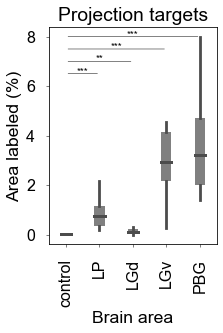

In [24]:
# significance levels in number of asterix from results above
area_asterix = ["***", "**", "***", "***"]

# plot % area labeled as boxplots
boxp1 = sns.boxplot(data=labeling_data, x="brain area", y="Percent Thresholded Area", 
            order=area_labels, color=[.5, .5, .5], width=.3, **boxplot_settings)
boxp1.set_xlabel("Brain area")
boxp1.set_xticklabels(area_labels, rotation=90)
boxp1.set_ylabel("Area labeled (%)")
boxp1.set_title("Projection targets")

# plot significance levels
for area_count in range(len(area_labels)-1):
    annot_height = 6.5 + area_count*.5
    annot_width = area_count+1
    boxp1.annotate("", xy=(0, annot_height), xytext=(annot_width, annot_height), arrowprops=dict(arrowstyle="-"))
    boxp1.text(annot_width/2, annot_height, area_asterix[area_count], ha="center")
plt.gcf().set_size_inches(3, 4)

fig_name = "axon terminal density"
plt.savefig(os.path.join(save_path, fig_name + '.pdf'), dpi = 300, bbox_inches = 'tight')

### Plot peak density of axon terminals in labeled areas

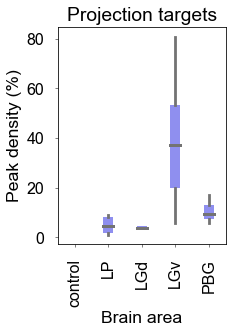

In [23]:
# plot peak density (%) as boxplots
boxp1 = sns.boxplot(data=labeling_data, x="brain area", y="Peak density (50x50um^2)", 
            order=area_labels, color=[.5, .5, 1], width=.3, **boxplot_settings)
boxp1.set_xlabel("Brain area")
boxp1.set_xticklabels(area_labels, rotation=90)
boxp1.set_ylabel("Peak density (%)")
boxp1.set_title("Projection targets")
plt.gcf().set_size_inches(3, 4)

# save figure
fig_name = "axon terminal peak density"
plt.savefig(os.path.join(save_path, fig_name + '.pdf'), dpi = 300, bbox_inches = 'tight')